<a href="https://colab.research.google.com/github/angelostefanini/data_analytics/blob/main/Esercitazione_digital_marketing_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
import pandas as pd

df=pd.read_csv("data.csv", encoding="ISO-8859-1",
                         dtype={'CustomerID': str,'InvoiceID': str})


**Data overview and summary** **statistics**

In [93]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047,United Kingdom


In [94]:
# Filtra il DataFrame per il CustomerID 17850
customer_data = df.loc[df['CustomerID'] == 17850]

# Stampa il DataFrame filtrato
print(customer_data)





Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


***Descrizione delle variabili***

InvoiceNo: Il numero della fattura, identificato nominalmente come un numero intero a 6 cifre assegnato univocamente a ogni transazione. Se il codice inizia con la lettera 'c', indica una cancellazione.

StockCode: Il codice del prodotto (articolo), designato nominalmente come un numero intero a 5 cifre assegnato univocamente a ciascun prodotto distinto.

Description: Il nome del prodotto (articolo), categorizzato come nominale.

Quantity: Le quantità di ciascun prodotto (articolo) per transazione, rappresentate numericamente.

InvoiceDate: La data e l'ora della fattura, rappresentate numericamente, indicando il giorno e l'ora di ciascuna transazione.

UnitPrice: Il prezzo unitario del prodotto, indicato numericamente come il prezzo per unità in sterline.

CustomerID: Il numero del cliente, indicato nominalmente come un numero intero a 5 cifre assegnato univocamente a ciascun cliente.

Country: Il nome del paese, identificato nominalmente come il paese in cui risiede ciascun cliente.

In [95]:
df.shape

(541909, 8)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


Identifico e quantifico i valori nulli

In [97]:
missing_values = df.isnull().sum()
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Ci sono 135080 righe vuote nel campo customer id

In [98]:
tipi_colonne = df.dtypes
print(tipi_colonne)


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object


Mostro il numero di righe e colonne

In [99]:
# Calcola la nuova colonna
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Visualizza il DataFrame con la nuova colonna aggiunta
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  

In [100]:
num_rows, num_columns = df.shape
print(f'Numero di righe: {num_rows}')
print(f'Numero di colonne: {num_columns}')


Numero di righe: 541909
Numero di colonne: 9


In [101]:
df.describe()

,Quantity,UnitPrice,TotalPrice
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,17.987795
std,218.081158,96.759853,378.810824
min,-80995.000000,-11062.060000,-168469.600000
25%,1.000000,1.250000,3.400000
50%,3.000000,2.080000,9.750000
75%,10.000000,4.130000,17.400000
max,80995.000000,38970.000000,168469.600000


**I dati evidenziano la presenza di valori negativi per quantity e unit price**, la quantità minima di acquisto è -80995, il che potrebbe essere un'anomalia o un reso, mentre il prezzo unitario massimo è di 11062.

- Analisi della distribuzione della quantità ("Quantity"):

La media di 9.5 e la deviazione standard di 218.32 indicano una forte variabilità nei quantitativi acquistati

- Analisi dei prezzi unitari ("UnitPrice"):

**La media di 4.61 **e la deviazione standard di 114.62 mostrano una vasta gamma di prezzi unitari.

L'individuazione dei prodotti con prezzi estremamente alti (max = 38970) potrebbe rivelare articoli di lusso o potenziali errori nei dati.

- Analisi del comportamento dei clienti ("CustomerID"):

La mancanza di dati per alcuni clienti potrebbe indicare transazioni effettuate da clienti non registrati o dati mancanti.

L'analisi della distribuzione dei clienti in base alla frequenza e al valore degli acquisti potrebbe identificare segmenti di clientela distinti, utili per strategie di marketing mirate.

- Esplorazione delle relazioni tra le variabili:

Un'analisi della correlazione tra la quantità e il prezzo unitario potrebbe rivelare se esistono tendenze di acquisto basate sul prezzo.

L'identificazione di cluster di clienti in base ai loro acquisti potrebbe suggerire comportamenti di acquisto simili o preferenze di prodotto comuni.

 **I isolate the null values in the 'Label' column and display their descriptive statistics as follows:**

In [102]:
null_df = df[df['CustomerID'].isnull()]
null_df.describe()
print(null_df.describe())


            Quantity      UnitPrice     TotalPrice
count  135080.000000  135080.000000  135080.000000
mean        1.995573       8.076577      10.717220
std        66.696153     151.900816     157.967893
min     -9600.000000  -11062.060000  -17836.460000
25%         1.000000       1.630000       2.460000
50%         1.000000       3.290000       4.960000
75%         3.000000       5.450000      10.790000
max      5568.000000   17836.460000   13541.330000


I isolate the values with non-null labels and extract their descriptive statistical
characteristics


In [103]:
not_null_values = df[~df['CustomerID'].isnull()]
# Display summary stats of rows without null values
not_null_values.describe()
print(not_null_values.describe())


            Quantity      UnitPrice     TotalPrice
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471      20.401854
std       248.693370      69.315162     427.591718
min    -80995.000000       0.000000 -168469.600000
25%         2.000000       1.250000       4.200000
50%         5.000000       1.950000      11.100000
75%        12.000000       3.750000      19.500000
max     80995.000000   38970.000000  168469.600000


**Variabile Quantity:**

La media della quantità nella prima tabella è 1.99, mentre nella seconda tabella è 8.07.
La deviazione standard della quantità nella prima tabella è 66.931, mentre nella seconda tabella è 248.411.
Variabile UnitPrice:

La media dei prezzi unitari nella prima tabella è 8.294, mentre nella seconda tabella è 3.675.
La deviazione standard dei prezzi unitari nella prima tabella è 164.271, mentre nella seconda tabella è 89.215.
Dai confronti sopra riportati, sembra che ci siano differenze significative nelle medie e nelle deviazioni standard delle variabili "Quantity" e "UnitPrice" tra le due tabelle.

E' evidente che ci sono delle differenze fra gli utenti con o senza customer id: gli utenti senza customer id comprano meno e comprano ad un prezzo sensibilmente piu' alto, questo è un possibile punto di analisi

 **I am checking for statistical significance **in the differences between the two groups highlighted earlier through the two tables, especially the variables null_df and not_null_values. To do this, I am using the difference between the mean and standard deviation in the two tables and performing the Student's t-test on the
means:


In [104]:
from scipy.stats import ttest_ind
# Colonne di interesse
colonne_di_interesse = ['Quantity', 'UnitPrice', "TotalPrice"]

from scipy.stats import ttest_ind

for colonna in colonne_di_interesse:
    # Estraggo media e deviazione standard dai due DataFrame
    media_not_null = not_null_values[colonna].mean()
    std_not_null = not_null_values[colonna].std()
    media_null = null_df[colonna].mean()
    std_null = null_df[colonna].std()

    # Calcolo la differenza nelle medie
    diff_media = media_not_null - media_null

    # Calcolo la differenza nelle deviazioni standard
    diff_std = std_not_null - std_null

    # Eseguo il test t di Student solo sulle medie
    t_statistic, p_value = ttest_ind(not_null_values[colonna], null_df[colonna], nan_policy='omit')

    # Visualizzo i risultati
    print(f'Colonna: {colonna}')
    print(f'Differenza nelle Medie: {diff_media}')
    print(f'Differenza nelle Deviazioni Standard: {diff_std}')
    print(f'T-Statistic (sulle Medie): {t_statistic}')
    print(f'P-Value (sulle Medie): {p_value}')
    print('\n')



Colonna: Quantity
Differenza nelle Medie: 10.065730403960586
Differenza nelle Deviazioni Standard: 181.99721734024183
T-Statistic (sulle Medie): 14.701160893581088
P-Value (sulle Medie): 6.475677485825383e-49


Colonna: UnitPrice
Differenza nelle Medie: -4.616105898846249
Differenza nelle Deviazioni Standard: -82.58565455558109
T-Statistic (sulle Medie): -15.195358892044718
P-Value (sulle Medie): 3.891107383304532e-52


Colonna: TotalPrice
Differenza nelle Medie: 9.68463357066786
Differenza nelle Deviazioni Standard: 269.62382498142654
T-Statistic (sulle Medie): 8.141890748565892
P-Value (sulle Medie): 3.8996567772686944e-16




 p-values are above 0.05, suggesting that there are no statistically
significant differences in the means and standard deviations of the considered
columns between the two groups.

Decido di rimuovere le righe senza customer id in quanto non potranno aggiungere nessuna informazione al tentativo di clusterizzazione

In [105]:
senza_customerid = 135080/541909
print(senza_customerid)

0.249266943342886


Circa il 25% delle transazioni è stato eseguito da utenti senza customerID. Dai dati emerge che le transazioni senza customer id sono di importo nettamente superiore ma la quantità è inferiore, si tratta probabilmente di utenti occasionali

Dato che le righe senza customer id non hanno rilevanza statistica a causa del basso p-value provvedo ad eliminare le transazioni senza customer id in quanto non sono utili per clusterizzare i miei clienti e sono da trattare in sede separata

In [106]:
# Rimuovo le righe con valori nulli nella colonna 'CustomerID'
df = df.dropna(subset=['CustomerID'])

# Visualizzo il DataFrame senza righe con CustomerID nulli
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  

In [107]:
# Rimuovo le righe con valori nulli nella colonna 'Description'
df = df.dropna(subset=['Description'])

In [108]:
# rimuovo le righe duplicate
df = df.drop_duplicates()

# Visualizza il DataFrame senza righe duplicate
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  

In [109]:
righe_duplicate = 406829-401604
print(righe_duplicate)

5225


Rimosse 5225 righe duplicate

In [110]:
# Raggruppa le transazioni in base al paese
transazioni_per_paese = df.groupby('Country')

# Stampare il numero di transazioni per ciascun paese
print(transazioni_per_paese.size())

Country
Australia                 1258
Austria                    401
Bahrain                     17
Belgium                   2069
Brazil                      32
Canada                     151
Channel Islands            757
Cyprus                     611
Czech Republic              30
Denmark                    389
EIRE                      7475
European Community          61
Finland                    695
France                    8475
Germany                   9480
Greece                     146
Iceland                    182
Israel                     247
Italy                      803
Japan                      358
Lebanon                     45
Lithuania                   35
Malta                      127
Netherlands               2371
Norway                    1086
Poland                     341
Portugal                  1471
RSA                         58
Saudi Arabia                10
Singapore                  229
Spain                     2528
Sweden                     461


Uk, Germany and France sono i paesi piu' importanti per numero di ordini

In [111]:
# Importa le librerie necessarie
import plotly.express as px
import pandas as pd

# Crea un DataFrame con i dati forniti
data = {
    'Country': ['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE', 'European Community', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified'],
    'Transactions': [1258, 401, 17, 2069, 32, 151, 757, 611, 30, 389, 7475, 61, 695, 8475, 9480, 146, 182, 247, 803, 358, 45, 35, 127, 2371, 1086, 341, 1471, 58, 10, 229, 2528, 461, 1877, 291, 68, 356728, 241]
}

df1 = pd.DataFrame(data)

# Plotta la mappa mondiale utilizzando Plotly Express
fig = px.choropleth(df1, locations='Country', locationmode='country names', color='Transactions',
                    color_continuous_scale=px.colors.sequential.Blues,
                    title='Numero di Transazioni per Paese')
fig.update_layout(geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'))
fig.show()



In [112]:


print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')


In [113]:
# Raggruppa per paese e somma gli importi totali degli ordini
totali_per_paese = df.groupby('Country')['TotalPrice'].sum().reset_index()

# Stampa la tabella
print(totali_per_paese)


                 Country   TotalPrice
0              Australia   137009.770
1                Austria    10154.320
2                Bahrain      548.400
3                Belgium    40910.960
4                 Brazil     1143.600
5                 Canada     3666.380
6        Channel Islands    20076.390
7                 Cyprus    12858.760
8         Czech Republic      707.720
9                Denmark    18768.140
10                  EIRE   250001.780
11    European Community     1291.750
12               Finland    22326.740
13                France   196626.050
14               Germany   221509.470
15                Greece     4710.520
16               Iceland     4310.000
17                Israel     6988.400
18                 Italy    16890.510
19                 Japan    35340.620
20               Lebanon     1693.880
21             Lithuania     1661.060
22                 Malta     2505.470
23           Netherlands   284661.540
24                Norway    35163.460
25          

In termini di importo complessivo lo Uk resta di gran lunga il primo paese seguito a grande distanza da Olanda ed Irlanda

Plotto il fatturato complessivo per paese secondo la tabella precedente

In [114]:
import plotly.express as px

# Dati
data = {
    'Country': ['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE', 'European Community', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified'],
    'TotalPrice': [137009.770, 10154.320, 548.400, 40910.960, 1143.600, 3666.380, 20076.390, 12858.760, 707.720, 18768.140, 250001.780, 1291.750, 22326.740, 196626.050, 221509.470, 4710.520, 4310.000, 6988.400, 16890.510, 35340.620, 1693.880, 1661.060, 2505.470, 284661.540, 35163.460, 7213.140, 28995.760, 1002.310, 131.170, 9120.390, 54756.030, 36585.410, 55739.400, 1730.920, 1902.280, 6747156.154, 2660.770]
}

# Creare un dataframe Plotly Express
df2 = pd.DataFrame(data)

# Creare una mappa con Plotly Express
fig = px.choropleth(df2, locations='Country', locationmode='country names', color='TotalPrice',
                    hover_name='Country', color_continuous_scale='Blues',
                    title='Total Turn-over by Country')

# Mostrare la mappa
fig.show()



In [115]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')


In [116]:
import pandas as pd

# Filtra il DataFrame per escludere le fatture con importo negativo
df_positive_total_price = df[df['TotalPrice'] > 0]

# Raggruppa il DataFrame filtrato per 'Country' e 'InvoiceNo', quindi calcola l'importo medio di ogni fattura per paese
average_invoice_per_country = df_positive_total_price.groupby(['Country', 'InvoiceNo'])['TotalPrice'].mean().reset_index()

# Raggruppa il DataFrame risultante per 'Country' e calcola l'importo medio delle fatture per paese
average_invoice_per_country = average_invoice_per_country.groupby('Country')['TotalPrice'].mean().reset_index()

# Rinomina la colonna dell'importo medio
average_invoice_per_country = average_invoice_per_country.rename(columns={'TotalPrice': 'AverageInvoicePrice'})

# Visualizza il nuovo DataFrame
print(average_invoice_per_country)




                 Country  AverageInvoicePrice
0              Australia           128.526786
1                Austria            35.432370
2                Bahrain            28.794231
3                Belgium            22.014117
4                 Brazil            35.737500
5                 Canada           190.985239
6        Channel Islands            62.037738
7                 Cyprus            62.299323
8         Czech Republic            32.182667
9                Denmark            58.481364
10                  EIRE            64.850720
11    European Community            26.527246
12               Finland            69.631678
13                France            53.198905
14               Germany            34.659501
15                Greece            31.381168
16               Iceland            23.096997
17                Israel            28.410571
18                 Italy            31.647994
19                 Japan           552.153526
20               Lebanon          

Creo una singola riga contenente il numero totale di prodotti distinti, transazioni e clienti nel DataFrame

In [117]:
import pandas as pd

# Calcola il numero totale di prodotti distinti, transazioni e clienti
data = [{
    'products': len(df['StockCode'].value_counts()),
    'Invoices': len(df['InvoiceNo'].value_counts()),
    'customers': len(df['CustomerID'].value_counts())
}]

# Crea il DataFrame
summary_df = pd.DataFrame(data, columns=['products', 'Invoices', 'customers'], index=['quantity'])

# Visualizza il DataFrame
print(summary_df)


          products  Invoices  customers
quantity      3684     22190       4372


Raggruppo per numero di fattura e Customer ID, e poi sommo per quantity e Total price. Emerge chiaramente la presenza di fatture cancellate ed emerge ovviamente la presenza di clienti altospendenti e basso spendenti

In [118]:
# Raggruppa per numero di fattura e ordino per Customer ID, e poi esegui l'aggregazione
grouped = df.groupby(['InvoiceNo', 'CustomerID']).agg({
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).reset_index()

# Escludi le fatture con importo negativo
grouped_positive = grouped[grouped['TotalPrice'] > 0]

# Ordina per Customer ID
grouped.sort_values(by='CustomerID', inplace=True)

# Visualizza il DataFrame risultante
print(grouped_positive)

      InvoiceNo CustomerID  Quantity  TotalPrice
0        536365      17850        40      139.12
1        536366      17850        12       22.20
2        536367      13047        83      278.73
3        536368      13047        15       70.05
4        536369      13047         3       17.85
...         ...        ...       ...         ...
18531    581583      13777        76      124.60
18532    581584      13777       120      140.64
18533    581585      15804       278      329.05
18534    581586      13113        66      339.20
18535    581587      12680       105      249.45

[18532 rows x 4 columns]


In [119]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice'],
      dtype='object')

Ripartizione degli ordini per importo delle fatture, tengo in considerazione solo quelle con importo positivo ed escludo le fatture negative:




In [120]:
# Escludi le fatture con importo negativo
grouped_positive = grouped[grouped['TotalPrice'] > 0]

# Definisci gli intervalli di importo
intervals = [(0, 50), (50, 100), (100, 200), (200, 500), (500, 1000), (1000, 5000), (5000, float('inf'))]

# Funzione per classificare le fatture in base all'importo totale
def classify_total_price(total_price):
    for i, interval in enumerate(intervals):
        if interval[0] <= total_price < interval[1]:
            return f'Range_{i+1}'
    return 'Over_5000'

# Applica la funzione alla colonna 'TotalPrice' per creare una nuova colonna 'PriceCategory'
grouped_positive['PriceCategory'] = grouped_positive['TotalPrice'].apply(classify_total_price)

# Visualizza il DataFrame risultante
print(grouped_positive)

      InvoiceNo CustomerID  Quantity  TotalPrice PriceCategory
1909     541431      12346     74215    77183.60       Range_7
2205     542237      12347       315      475.39       Range_4
10173    562032      12347       277      584.91       Range_5
548      537626      12347       319      711.79       Range_5
7844     556201      12347       196      382.52       Range_4
...         ...        ...       ...         ...           ...
8040     556731      18283        52      103.72       Range_3
2054     541854      18283        66      105.30       Range_3
13860    570715      18287       990     1001.32       Range_6
14889    573167      18287       108       70.68       Range_2
6974     554065      18287       488      765.28       Range_5

[18532 rows x 5 columns]


<ipython-input-120-9f95ac64fb04>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



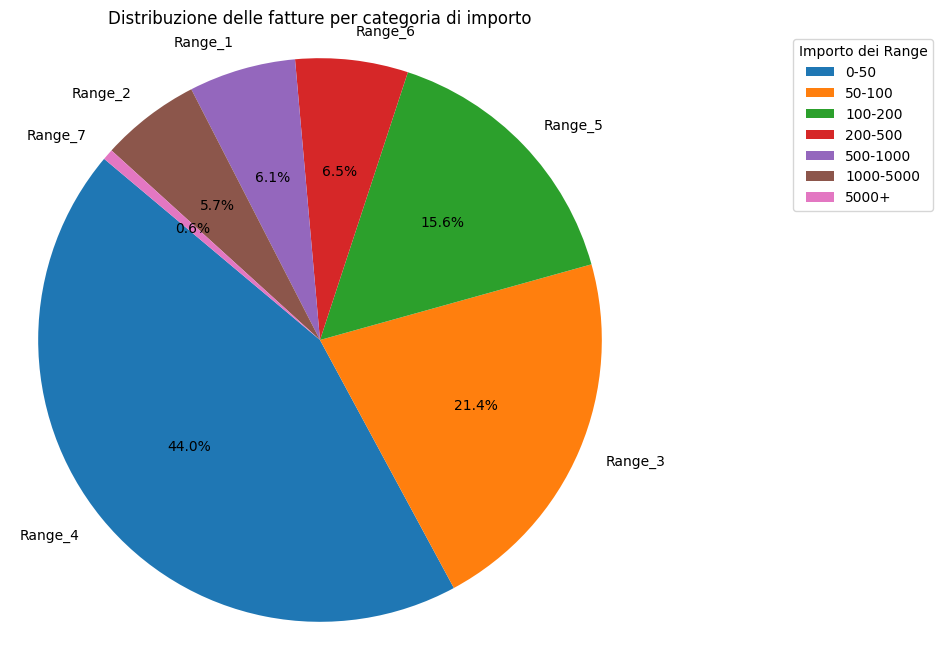

In [121]:
import matplotlib.pyplot as plt

# Conta il numero di fatture in ciascuna categoria di importo
price_counts = grouped_positive['PriceCategory'].value_counts()

# Crea il grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%', startangle=140)

# Aggiungi la legenda personalizzata con l'importo dei range
importo_range = ['0-50', '50-100', '100-200', '200-500', '500-1000', '1000-5000', '5000+']
plt.legend(importo_range, title="Importo dei Range", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribuzione delle fatture per categoria di importo')
plt.axis('equal')  # Assicura che il grafico a torta sia circolare
plt.show()

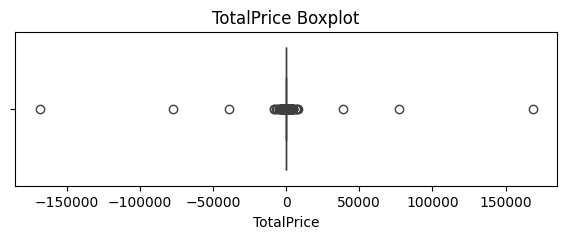

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 2))
ax = sns.boxplot(x=df['TotalPrice'])
plt.title('TotalPrice Boxplot')
plt.show()


Le fatture negative sono state rimosse, è necessario rimuovere quelle positivile di uguale importo in quanto si tratta evidentemente di errori

# **Ordini cancellati** - Cercherò di elminare gli ordini cancellati in quanto rappresentano delle ripetizioni e quindi inquinano i dati: quanti sono gli ordini cancellati?





In [123]:
cancellations = grouped[grouped['InvoiceNo'].str.startswith('C')]
purchases = grouped[~grouped['InvoiceNo'].str.startswith('C')]


print(cancellations)
print(purchases)

      InvoiceNo CustomerID  Quantity  TotalPrice
18958   C541433      12346    -74215   -77183.60
19509   C547388      12352       -63     -120.33
19299   C545329      12352        -2     -463.80
19300   C545330      12352        -1     -376.50
22094   C580165      12359        -6      -91.25
...         ...        ...       ...         ...
21942   C577832      18274       -88     -175.92
21906   C577386      18276        -1       -6.25
21909   C577390      18276        -1       -6.25
19017   C542086      18277        -1      -12.75
20777   C562808      18282        -5       -1.45

[3654 rows x 4 columns]
      InvoiceNo CustomerID  Quantity  TotalPrice
1909     541431      12346     74215    77183.60
2205     542237      12347       315      475.39
10173    562032      12347       277      584.91
548      537626      12347       319      711.79
7844     556201      12347       196      382.52
...         ...        ...       ...         ...
8040     556731      18283        52      10

In [124]:
# Conto le fatture che iniziano con la lettera 'C' nella colonna 'InvoiceNo'
cancellations_count = grouped[grouped['InvoiceNo'].str.startswith('C')].shape[0]

print("Numero di fatture di cancellazione:", cancellations_count)

Numero di fatture di cancellazione: 3654


Numero di fatture complessive 22190

In [125]:
percentuale_fatture_cancellate = 3654/22190
print(percentuale_fatture_cancellate)

0.16466876971608832


In [126]:
# Conto le fatture che iniziano con la lettera 'C' nella colonna 'InvoiceNo'
cancellations_count_df = df[df['InvoiceNo'].str.startswith('C')].shape[0]

print("Numero di fatture cancellate:", cancellations_count_df)


Numero di fatture cancellate: 8872


In [127]:
perc_transazioni_cancellate = 8872/401604
print(perc_transazioni_cancellate)

0.02209141343213713


In [128]:
df.shape

(401604, 9)

(DA FINIRE) Il numero degli ordini cancellati è pari al 16%, molto alto e quindi potenzialmente in grado di inquinare i miei dati, cercherò quindi di andare a rintracciare gli ordini di acquisto corrispondenti

In [129]:
import pandas as pd

df=pd.read_csv("data.csv", encoding="ISO-8859-1",
                         dtype={'CustomerID': str,'InvoiceID': str})


# Raggruppa le transazioni per paese e calcola il numero totale di transazioni per ciascun paese
total_transactions_by_country = df.groupby('Country').size()

# Filtra le transazioni cancellate
cancelled_transactions = df[df['Quantity'] < 0]

# Raggruppa le transazioni cancellate per paese e calcola il numero di transazioni cancellate per ciascun paese
cancelled_transactions_by_country = cancelled_transactions.groupby('Country').size()

# Calcola il tasso di cancellazione per ciascun paese
cancellation_rate_by_country = cancelled_transactions_by_country / total_transactions_by_country

# Stampa il tasso di cancellazione per ciascun paese
print("Tasso di cancellazione delle transazioni per paese:")
print(cancellation_rate_by_country)


Tasso di cancellazione delle transazioni per paese:
Country
Australia               0.058777
Austria                 0.007481
Bahrain                 0.052632
Belgium                 0.018366
Brazil                       NaN
Canada                       NaN
Channel Islands         0.013193
Cyprus                  0.012862
Czech Republic          0.166667
Denmark                 0.023136
EIRE                    0.036847
European Community      0.016393
Finland                 0.014388
France                  0.017413
Germany                 0.047709
Greece                  0.006849
Hong Kong               0.013889
Iceland                      NaN
Israel                  0.006734
Italy                   0.056040
Japan                   0.103352
Lebanon                      NaN
Lithuania                    NaN
Malta                   0.118110
Netherlands             0.003374
Norway                  0.012891
Poland                  0.032258
Portugal                0.011850
RSA             


Il dato in percentuale di cancellazione più alto é stato registrato negli Stati Uniti d'America ed indica che il 38.49% delle transazioni effettuate negli Stati Uniti è stato cancellato.

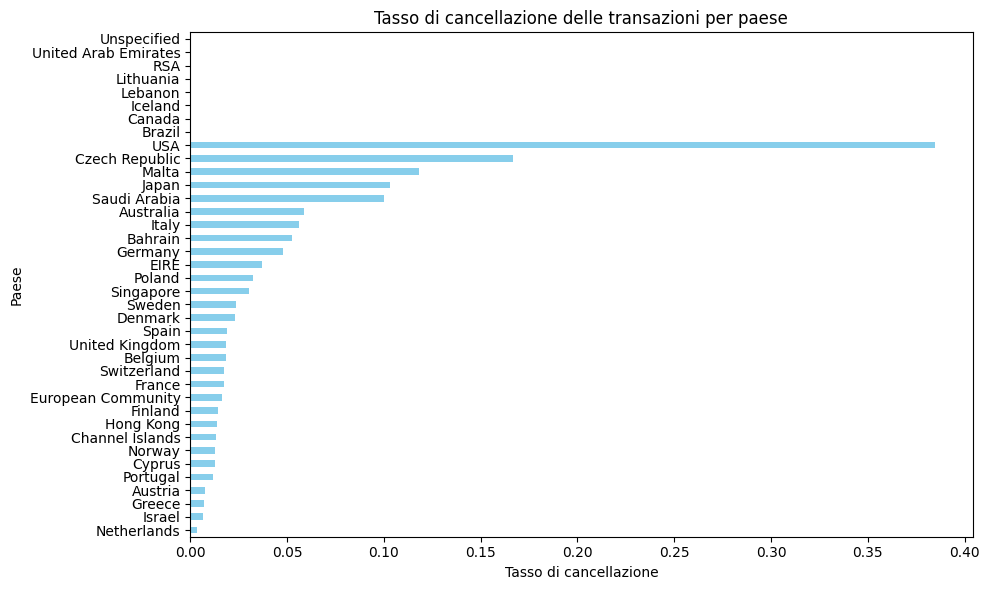

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Supponendo che il calcolo del tasso di cancellazione sia stato eseguito come descritto nel tuo codice

# Creazione del grafico
plt.figure(figsize=(10, 6))  # Imposta le dimensioni del grafico

# Ordina i paesi in base al tasso di cancellazione
cancellation_rate_by_country_sorted = cancellation_rate_by_country.sort_values()

# Plot
cancellation_rate_by_country_sorted.plot(kind='barh', color='skyblue')

# Aggiunta di titoli e label
plt.title('Tasso di cancellazione delle transazioni per paese')
plt.xlabel('Tasso di cancellazione')
plt.ylabel('Paese')

# Mostra il grafico
plt.tight_layout()  # Ottimizza il layout
plt.show()


Visualizzazione relativa del tasso di cancellazione per paese

In [131]:
# Separare le fatture di acquisto e cancellazione
cancellations = grouped[grouped['InvoiceNo'].str.startswith('C')]
purchases = grouped[~grouped['InvoiceNo'].str.startswith('C')]

# Unire le fatture di cancellazione con quelle di acquisto
matched = cancellations.merge(purchases, on=['CustomerID', 'TotalPrice'], suffixes=('_cancellation', '_purchase'))

# Selezionare solo le righe che soddisfano le condizioni con una tolleranza
matched = matched[abs(matched['Quantity_cancellation']) == abs(matched['Quantity_purchase'])]

print(matched)




Empty DataFrame
Columns: [InvoiceNo_cancellation, CustomerID, Quantity_cancellation, TotalPrice, InvoiceNo_purchase, Quantity_purchase]
Index: []


In [132]:
# rimuovo le righe duplicate
df = df.drop_duplicates()

# Visualizza il DataFrame senza righe duplicate
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice CustomerID         Country  
0        12

In [133]:
# Filtrare le transazioni cancellate
cancellations = df[df['InvoiceNo'].str.startswith('C')]


# Filtrare le transazioni di acquisto
purchases = df[~df['InvoiceNo'].str.startswith('C')]

# Unire le transazioni cancellate con quelle di acquisto basate sullo stesso CustomerID, stesso importo negativo e stessa descrizione
matched = cancellations.merge(purchases, on=['CustomerID', 'Description'], suffixes=('_cancellation', '_purchase'))

# Selezionare solo le righe che soddisfano le condizioni con una tolleranza
matched = matched[(matched['Quantity_cancellation'] == -matched['Quantity_purchase'])]

print(matched[:20])




    InvoiceNo_cancellation StockCode_cancellation  \
26                 C536543                  22355   
28                 C536543                  22355   
29                 C536543                  22355   
32                 C536543                  22355   
38                 C536543                  22355   
39                 C536543                  22355   
53                 C536543                  22355   
54                 C536543                  22355   
55                 C536543                  22355   
59                 C536543                  22355   
90                 C536548                  22168   
95                 C536622                  22752   
103                C536734                  22780   
104                C538109                  22780   
105                C536734                  85048   
106                C538109                  85048   
237                C536822                  22847   
249                C536979                  84

**StockCode Cleaning**

Alcuni codici nella colonna stock code non corrispondono a transazioni e devono quindi essere identificati ed eventualmente modificati

In [134]:
# Tratta i valori mancanti nella colonna 'StockCode' con fillna('')
df['StockCode'] = df['StockCode'].fillna('')

# Seleziona le celle della colonna 'StockCode' che contengono solo testo senza numeri
text_only_stock_codes = df[df['StockCode'].str.match(r'^[^\d]+$')]['StockCode']

# Conta quante celle soddisfano il criterio
text_only_count = text_only_stock_codes.count()

# Ottieni una lista univoca dei loro contenuti
unique_text_only_stock_codes = text_only_stock_codes.unique()

print("Numero di celle con solo testo senza numeri nella colonna 'StockCode':", text_only_count)
print("Lista univoca dei contenuti:", unique_text_only_stock_codes)

Numero di celle con solo testo senza numeri nella colonna 'StockCode': 2790
Lista univoca dei contenuti: ['POST' 'D' 'DOT' 'M' 'BANK CHARGES' 'S' 'AMAZONFEE' 'm' 'DCGSSBOY'
 'DCGSSGIRL' 'PADS' 'B' 'CRUK']


In [135]:
# Lista dei valori da rimuovere
valori_da_rimuovere = ['POST', 'D', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK']

# Rimuovi le righe con i valori specificati nella colonna 'StockCode'
df = df[~df['StockCode'].isin(valori_da_rimuovere)]

df.shape

(533975, 8)

POST: Probabilmente indica spese postali o costi di spedizione associati a un ordine.

D: Indica uno sconto applicato a un ordine o a un articolo specifico.

M: Potrebbe indicare una transazione registrata manualmente per un motivo specifico.

BANK CHARGES: Si riferisce alle spese bancarie associate a un'operazione finanziaria.

PADS: Probabilmente si riferisce a cuscinetti o inserti per cuscini.

DOT: Potrebbe indicare spese postali associate a ordini effettuati tramite una piattaforma online specifica.

CRUK: Potrebbe essere un codice interno o abbreviazione per un particolare articolo o servizio.

Visualizzo il numero di transazioni per mese

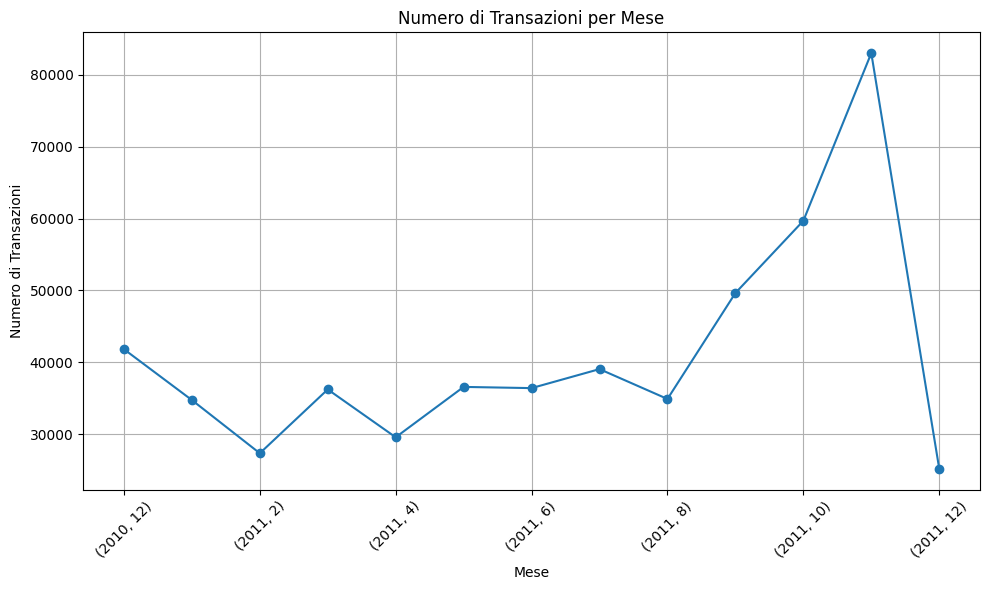

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertiamo la colonna 'InvoiceDate' in formato datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Estraiamo il mese e l'anno dalle date delle transazioni
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

# Contiamo il numero di transazioni per ogni mese e anno
transactions_per_month = df.groupby(['Year', 'Month']).size()

# Creiamo il grafico a linee
transactions_per_month.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Numero di Transazioni per Mese')
plt.xlabel('Mese')
plt.ylabel('Numero di Transazioni')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Dal grafico si evince che si ha un aumento di transazioni tra agosto e novembre, con relativo picco di transazioni eseguite a NOVEMBRE

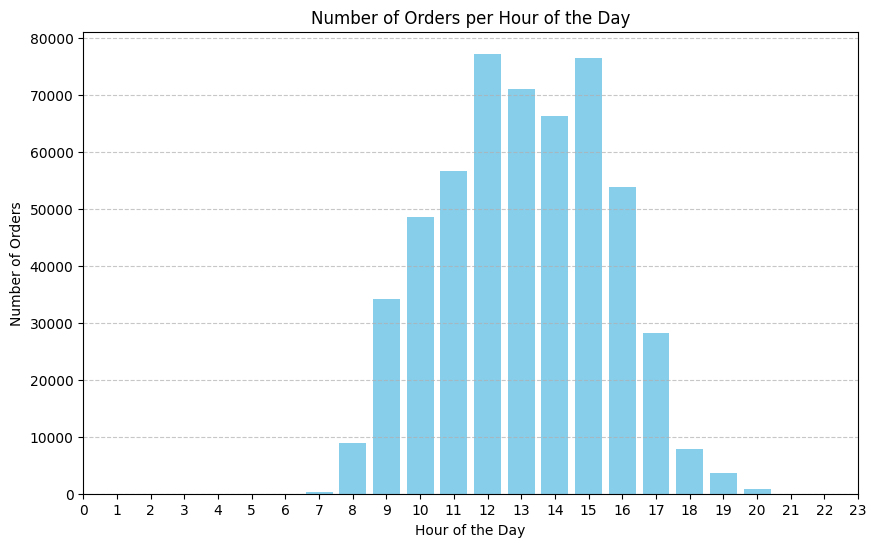

In [137]:
# Estrarre l'ora dall'orario di ciascun ordine
df['Hour'] = df['InvoiceDate'].dt.hour

import matplotlib.pyplot as plt

# Raggruppa i dati per ora e conta il numero di ordini per ogni ora
orders_per_hour = df.groupby('Hour').size()

# Plotta il numero di ordini per ogni ora
plt.figure(figsize=(10, 6))
plt.bar(orders_per_hour.index, orders_per_hour.values, color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Hour of the Day')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Il numero di ordini giornalieri avviene principalmente nella fascia oraria tra mezzogiorno e le h.15:00, con il picco più alto a MEZZOGIORNO.

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Genera dati casuali per l'esempio
# Supponiamo di avere già df con la colonna 'InvoiceDate' contenente la data e l'ora di ciascun ordine

# Estrai l'ora dall'orario di ciascun ordine
df['Hour'] = df['InvoiceDate'].dt.hour

# Raggruppa i dati per ora e conta il numero di ordini per ogni ora
transactions_per_hour = df.groupby('Hour').size()

# Crea un DataFrame con il numero di transazioni per ogni ora
hourly_transactions_df = pd.DataFrame(transactions_per_hour, columns=['Number of Transactions'])

# Aggiungi tutte le ore del giorno dalla 0 alle 23
for hour in range(24):
    if hour not in hourly_transactions_df.index:
        hourly_transactions_df.loc[hour] = 0

# Ordina l'indice
hourly_transactions_df.sort_index(inplace=True)



**Provvedo ora a fare un'analisi dei 20 articoli **piu' venduti secondo la colonna description in termini di quantità

In [139]:
df.shape

(533975, 11)

In [140]:


# Rimuovi gli ordini cancellati
df = df[~df['InvoiceNo'].str.startswith('C')]

# Raggruppa per stock code e description, somma le quantità ordinate
top_20 = df.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()

# Ordina in ordine decrescente basato sulla quantità e seleziona i primi 10 articoli
top_20 = top_20.sort_values(by='Quantity', ascending=False).head(20)

# Stampare i risultati
print(top_20)


     StockCode                         Description  Quantity
3029     23843         PAPER CRAFT , LITTLE BIRDIE     80995
2455     23166      MEDIUM CERAMIC TOP STORAGE JAR     78033
3610     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54951
4183    85099B             JUMBO BAG RED RETROSPOT     48375
4209    85123A  WHITE HANGING HEART T-LIGHT HOLDER     37584
1330     22197                      POPCORN HOLDER     36749
530      21212     PACK OF 72 RETROSPOT CAKE CASES     36396
3948     84879       ASSORTED COLOUR BIRD ORNAMENT     36362
2341     23084                  RABBIT NIGHT LIGHT     30739
1627     22492             MINI PAINT SET VINTAGE      26633
1772     22616          PACK OF 12 LONDON TISSUES      26323
1119     21977  PACK OF 60 PINK PAISLEY CAKE CASES     24820
1309     22178     VICTORIAN GLASS HANGING T-LIGHT     24275
14       15036           ASSORTED COLOURS SILK FAN     23826
91       17003                 BROCADE RING PURSE      23020
1083     21915          

In [141]:
import pandas as pd

# Rimuovi gli ordini cancellati
df = df[~df['InvoiceNo'].str.startswith('C')]

# Raggruppa per stock code, description e country, somma le quantità ordinate
top_20_uk = df[df['Country'] == 'United Kingdom'].groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()
top_20_world = df[df['Country'] != 'United Kingdom'].groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()

# Ordina in ordine decrescente basato sulla quantità e seleziona i primi 20 articoli per il Regno Unito e il resto del mondo
top_20_uk = top_20_uk.sort_values(by='Quantity', ascending=False).head(20).assign(Country='Regno Unito')
top_20_world = top_20_world.sort_values(by='Quantity', ascending=False).head(20).assign(Country='Resto del mondo')

# Concatenazione dei due DataFrame
combined_df = pd.concat([top_20_uk, top_20_world])

# Stampare i risultati
print("Top 20 articoli più venduti nel Regno Unito e nel resto del mondo:")
print(combined_df)



Top 20 articoli più venduti nel Regno Unito e nel resto del mondo:
     StockCode                          Description  Quantity          Country
3014     23843          PAPER CRAFT , LITTLE BIRDIE     80995      Regno Unito
2444     23166       MEDIUM CERAMIC TOP STORAGE JAR     77036      Regno Unito
3595     84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS     49430      Regno Unito
4165    85099B              JUMBO BAG RED RETROSPOT     44165      Regno Unito
4191    85123A   WHITE HANGING HEART T-LIGHT HOLDER     35434      Regno Unito
1326     22197                       POPCORN HOLDER     34726      Regno Unito
3931     84879        ASSORTED COLOUR BIRD ORNAMENT     33636      Regno Unito
1766     22616           PACK OF 12 LONDON TISSUES      25315      Regno Unito
527      21212      PACK OF 72 RETROSPOT CAKE CASES     24963      Regno Unito
1305     22178      VICTORIAN GLASS HANGING T-LIGHT     23663      Regno Unito
91       17003                  BROCADE RING PURSE      22768   

In [142]:
 # Rimuovi gli ordini cancellati
df = df[~df['InvoiceNo'].str.startswith('C')]

# Raggruppa per stock code, description e country, somma le quantità ordinate
top_20_uk = df[df['Country'] == 'United Kingdom'].groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()
top_20_world = df[df['Country'] != 'United Kingdom'].groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()

# Ordina in ordine decrescente basato sulla quantità e seleziona i primi 20 articoli per il Regno Unito e il resto del mondo
top_20_uk = top_20_uk.sort_values(by='Quantity', ascending=False).head(20)
top_20_world = top_20_world.sort_values(by='Quantity', ascending=False).head(20)

# Stampare i risultati per il Regno Unito
print("Top 20 articoli più venduti nel Regno Unito:")
print(top_20_uk)

# Stampare i risultati per il resto del mondo
print("\nTop 20 articoli più venduti nel resto del mondo:")
print(top_20_world)

Top 20 articoli più venduti nel Regno Unito:
     StockCode                         Description  Quantity
3014     23843         PAPER CRAFT , LITTLE BIRDIE     80995
2444     23166      MEDIUM CERAMIC TOP STORAGE JAR     77036
3595     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS     49430
4165    85099B             JUMBO BAG RED RETROSPOT     44165
4191    85123A  WHITE HANGING HEART T-LIGHT HOLDER     35434
1326     22197                      POPCORN HOLDER     34726
3931     84879       ASSORTED COLOUR BIRD ORNAMENT     33636
1766     22616          PACK OF 12 LONDON TISSUES      25315
527      21212     PACK OF 72 RETROSPOT CAKE CASES     24963
1305     22178     VICTORIAN GLASS HANGING T-LIGHT     23663
91       17003                 BROCADE RING PURSE      22768
14       15036           ASSORTED COLOURS SILK FAN     21066
1116     21977  PACK OF 60 PINK PAISLEY CAKE CASES     20331
1512     22386             JUMBO BAG PINK POLKADOT     19375
1327     22197                SMALL POPC

In [143]:
import pandas as pd

# Creazione dei DataFrame per i risultati
df_uk = pd.DataFrame({
    'StockCode': ['23166', '84077', '85099B', '85123A', '84879', '21212', '22616', '17003', '22178', '15036',
                  '21977', '22197', '22386', '22197', '47566', '85099F', '22469', '84755', '22693', '21915'],
    'Description': ['MEDIUM CERAMIC TOP STORAGE JAR', 'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'JUMBO BAG RED RETROSPOT',
                    'WHITE HANGING HEART T-LIGHT HOLDER', 'ASSORTED COLOUR BIRD ORNAMENT', 'PACK OF 72 RETROSPOT CAKE CASES',
                    'PACK OF 12 LONDON TISSUES', 'BROCADE RING PURSE', 'VICTORIAN GLASS HANGING T-LIGHT',
                    'ASSORTED COLOURS SILK FAN', 'PACK OF 60 PINK PAISLEY CAKE CASES', 'SMALL POPCORN HOLDER',
                    'JUMBO BAG PINK POLKADOT', 'POPCORN HOLDER', 'PARTY BUNTING', 'JUMBO BAG STRAWBERRY',
                    'HEART OF WICKER SMALL', 'COLOUR GLASS T-LIGHT HOLDER HANGING', 'GROW A FLYTRAP OR SUNFLOWER IN TIN',
                    'RED  HARMONICA IN BOX'],
    'Quantity': [76250.0, 43970.0, 37535.0, 30290.0, 27135.0, 22537.0, 21902.0, 21317.0, 20830.0, 20330.0,
                 19232.0, 18605.0, 17337.0, 16344.0, 16017.0, 15053.0, 14653.0, 14357.0, 13914.0, 12986.0]
})

df_world = pd.DataFrame({
    'StockCode': ['22492', '21212', '22629', '23084', '22630', '22326', '21731', '84077', '22554', '20719',
                  '22551', '22328', '21915', '84991', '22489', '20725', '21977', '22961', '22417', '20724'],
    'Description': ['MINI PAINT SET VINTAGE', 'PACK OF 72 RETROSPOT CAKE CASES', 'SPACEBOY LUNCH BOX',
                    'RABBIT NIGHT LIGHT', 'DOLLY GIRL LUNCH BOX', 'ROUND SNACK BOXES SET OF4 WOODLAND',
                    'RED TOADSTOOL LED NIGHT LIGHT', 'WORLD WAR 2 GLIDERS ASSTD DESIGNS',
                    'PLASTERS IN TIN WOODLAND ANIMALS', 'WOODLAND CHARLOTTE BAG', 'PLASTERS IN TIN SPACEBOY',
                    'ROUND SNACK BOXES SET OF 4 FRUITS', 'RED  HARMONICA IN BOX', '60 TEATIME FAIRY CAKE CASES',
                    'PACK OF 12 TRADITIONAL CRAYONS', 'LUNCH BAG RED RETROSPOT', 'PACK OF 60 PINK PAISLEY CAKE CASES',
                    'JAM MAKING SET PRINTED', 'PACK OF 60 SPACEBOY CAKE CASES', 'RED RETROSPOT CHARLOTTE BAG'],
    'Quantity': [10909.0, 10653.0, 7467.0, 7244.0, 6977.0, 5979.0, 5765.0, 5041.0, 4492.0, 4400.0,
                 4392.0, 4179.0, 4112.0, 4068.0, 4001.0, 3951.0, 3904.0, 3845.0, 3822.0, 3807.0]
})

# Visualizzazione dei DataFrame uno accanto all'altro
print("Top 20 articoli più venduti nel Regno Unito:")
print(df_uk)
print("\nTop 20 articoli più venduti nel resto del mondo:")
print(df_world)


Top 20 articoli più venduti nel Regno Unito:
   StockCode                          Description  Quantity
0      23166       MEDIUM CERAMIC TOP STORAGE JAR   76250.0
1      84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS   43970.0
2     85099B              JUMBO BAG RED RETROSPOT   37535.0
3     85123A   WHITE HANGING HEART T-LIGHT HOLDER   30290.0
4      84879        ASSORTED COLOUR BIRD ORNAMENT   27135.0
5      21212      PACK OF 72 RETROSPOT CAKE CASES   22537.0
6      22616            PACK OF 12 LONDON TISSUES   21902.0
7      17003                   BROCADE RING PURSE   21317.0
8      22178      VICTORIAN GLASS HANGING T-LIGHT   20830.0
9      15036            ASSORTED COLOURS SILK FAN   20330.0
10     21977   PACK OF 60 PINK PAISLEY CAKE CASES   19232.0
11     22197                 SMALL POPCORN HOLDER   18605.0
12     22386              JUMBO BAG PINK POLKADOT   17337.0
13     22197                       POPCORN HOLDER   16344.0
14     47566                        PARTY BUNTING   160

Visualizzo i giorni della settimana con più transazioni




In [144]:
import pandas as pd

# Carica i dati
df = pd.read_csv("data.csv", encoding="ISO-8859-1", dtype={'CustomerID': str,'InvoiceID': str})

# Converti la colonna 'InvoiceDate' in formato datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Estrai il giorno della settimana dalla colonna 'InvoiceDate' e salvalo in una nuova colonna 'Weekday'
df['Weekday'] = df['InvoiceDate'].dt.dayofweek  # 0 = Lunedì, 1 = Martedì, ..., 6 = Domenica

# Conta il numero di transazioni per ogni giorno della settimana
transactions_by_weekday = df['Weekday'].value_counts()

# Trova il giorno con il massimo numero di transazioni
max_transactions_day = transactions_by_weekday.idxmax()  # Ottieni l'indice del massimo valore

# Stampa il giorno della settimana con il massimo numero di transazioni
weekday_mapping = {0: 'Lunedì', 1: 'Martedì', 2: 'Mercoledì', 3: 'Giovedì', 4: 'Venerdì', 5: 'Sabato', 6: 'Domenica'}
most_transactions_weekday = weekday_mapping[max_transactions_day]
print(f"Il giorno della settimana con più transazioni è {most_transactions_weekday}.")


Il giorno della settimana con più transazioni è Giovedì.


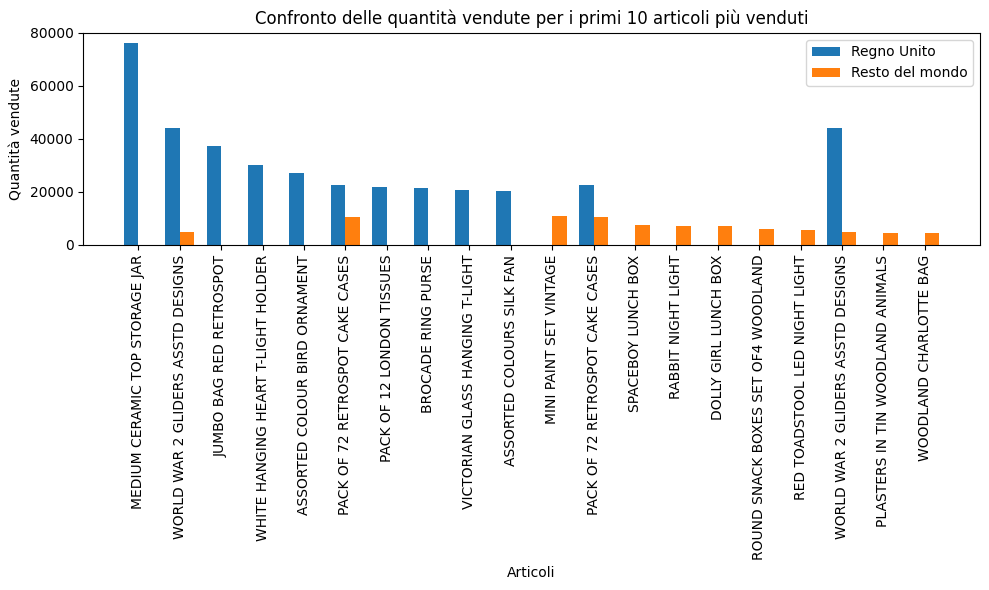

In [145]:
import matplotlib.pyplot as plt

# Creazione di un dizionario per i dati del Regno Unito
uk_data = dict(zip(df_uk['Description'], df_uk['Quantity']))

# Creazione di un dizionario per i dati del resto del mondo
world_data = dict(zip(df_world['Description'], df_world['Quantity']))

# Estrai i primi 10 articoli più venduti sia per il Regno Unito che per il resto del mondo
top_items = list(uk_data.keys())[:10] + list(world_data.keys())[:10]
uk_quantities = [uk_data[item] if item in uk_data else 0 for item in top_items]
world_quantities = [world_data[item] if item in world_data else 0 for item in top_items]

# Creazione del grafico a barre
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(top_items))

bar1 = plt.bar(index, uk_quantities, bar_width, label='Regno Unito')
bar2 = plt.bar([i + bar_width for i in index], world_quantities, bar_width, label='Resto del mondo')

plt.xlabel('Articoli')
plt.ylabel('Quantità vendute')
plt.title('Confronto delle quantità vendute per i primi 10 articoli più venduti')
plt.xticks([i + bar_width/2 for i in index], top_items, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


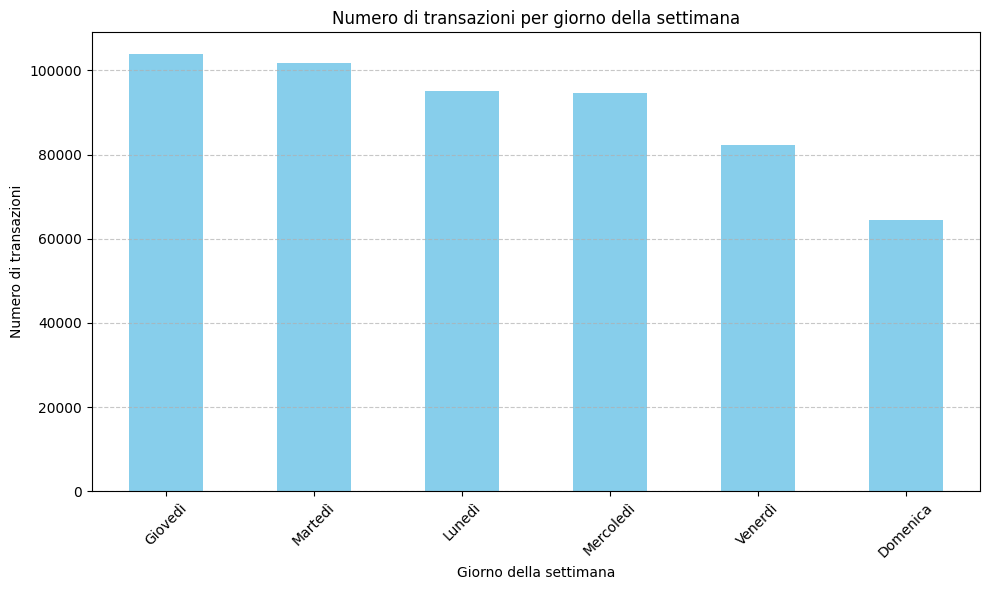

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica i dati
df = pd.read_csv("data.csv", encoding="ISO-8859-1", dtype={'CustomerID': str,'InvoiceID': str})

# Converti la colonna 'InvoiceDate' in formato datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Estrai il giorno della settimana dalla colonna 'InvoiceDate' e salvalo in una nuova colonna 'Weekday'
df['Weekday'] = df['InvoiceDate'].dt.dayofweek  # 0 = Lunedì, 1 = Martedì, ..., 6 = Domenica

# Conta il numero di transazioni per ogni giorno della settimana
transactions_by_weekday = df['Weekday'].value_counts()

# Mappa i valori numerici dei giorni della settimana ai nomi dei giorni
weekday_mapping = {0: 'Lunedì', 1: 'Martedì', 2: 'Mercoledì', 3: 'Giovedì', 4: 'Venerdì', 5: 'Sabato', 6: 'Domenica'}
transactions_by_weekday = transactions_by_weekday.rename(index=weekday_mapping)

# Visualizza i giorni della settimana con più transazioni usando un grafico a barre
plt.figure(figsize=(10, 6))
transactions_by_weekday.plot(kind='bar', color='skyblue')
plt.title('Numero di transazioni per giorno della settimana')
plt.xlabel('Giorno della settimana')
plt.ylabel('Numero di transazioni')
plt.xticks(rotation=45)  # Ruota le etichette sull'asse x per una migliore leggibilità
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Aggiungi griglia solo sull'asse y
plt.tight_layout()
plt.show()


Il numero di transazioni settimanali avvengono maggiormente Giovedì e Martedì, le quali superano le 100k.

In [147]:
from google.colab import drive

# Conta il numero totale di transazioni per ogni giorno della settimana
total_transactions_by_weekday = df.groupby('Weekday').size()

# Mappa i valori numerici dei giorni della settimana ai nomi dei giorni
total_transactions_by_weekday.index = total_transactions_by_weekday.index.map(weekday_mapping)

# Crea un DataFrame con il numero totale di transazioni per ogni giorno della settimana
total_transactions_df = pd.DataFrame(total_transactions_by_weekday, columns=['Total Transactions'])

# Ordina i giorni della settimana in ordine
days_of_week_order = ['Lunedì', 'Martedì', 'Mercoledì', 'Giovedì', 'Venerdì', 'Sabato', 'Domenica']
total_transactions_df = total_transactions_df.reindex(days_of_week_order)


Visualizzo le 100 keyword piu' utilizzate nel dataset all'interno della colonna description

In [148]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [149]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [150]:
import pandas as pd
from collections import Counter

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer



# Tokenizzazione e Pulizia dei Testi
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

descriptions = ' '.join(df['Description'].astype(str))
tokens = word_tokenize(descriptions)
cleaned_tokens = [ps.stem(token.lower()) for token in tokens if token.isalpha() and token.lower() not in stop_words]

# Conteggio delle Parole
word_counts = Counter(cleaned_tokens)


# Visualizzazione delle Parole Chiave
top_keywords = word_counts.most_common(100)
print("Le 100 parole chiave più comuni nel dataset:")
for keyword, count in top_keywords:
    print(f"{keyword}: {count}")


Le 100 parole chiave più comuni nel dataset:
set: 55499
bag: 52199
heart: 44186
red: 43367
retrospot: 35126
vintag: 33748
design: 30625
pink: 29977
box: 28367
christma: 25131
cake: 23048
metal: 21172
jumbo: 21139
white: 20813
blue: 19466
lunch: 18525
card: 17440
sign: 17237
hang: 17037
holder: 16514
tin: 16411
decor: 16387
pack: 15653
paper: 14365
small: 14333
wooden: 12708
polkadot: 12633
tea: 12429
glass: 12417
bottl: 12242
case: 12169
rose: 11788
water: 11358
spaceboy: 10831
hot: 10761
candl: 9930
larg: 9798
pantri: 9760
skull: 9561
home: 9545
paisley: 9326
ceram: 9180
green: 9136
regenc: 9120
colour: 8798
garden: 8758
dolli: 8447
mug: 8417
girl: 8409
doormat: 8385
ivori: 8205
mini: 8185
love: 8101
bowl: 8060
cream: 8045
bunt: 8001
star: 7589
assort: 7587
parti: 7559
ribbon: 7410
clock: 7381
feltcraft: 7216
children: 7215
black: 7210
wicker: 7141
kit: 6910
wrap: 6883
woodland: 6874
frame: 6856
light: 6795
fairi: 6777
doili: 6690
drawer: 6626
jar: 6520
antiqu: 6478
charlott: 6351
sil

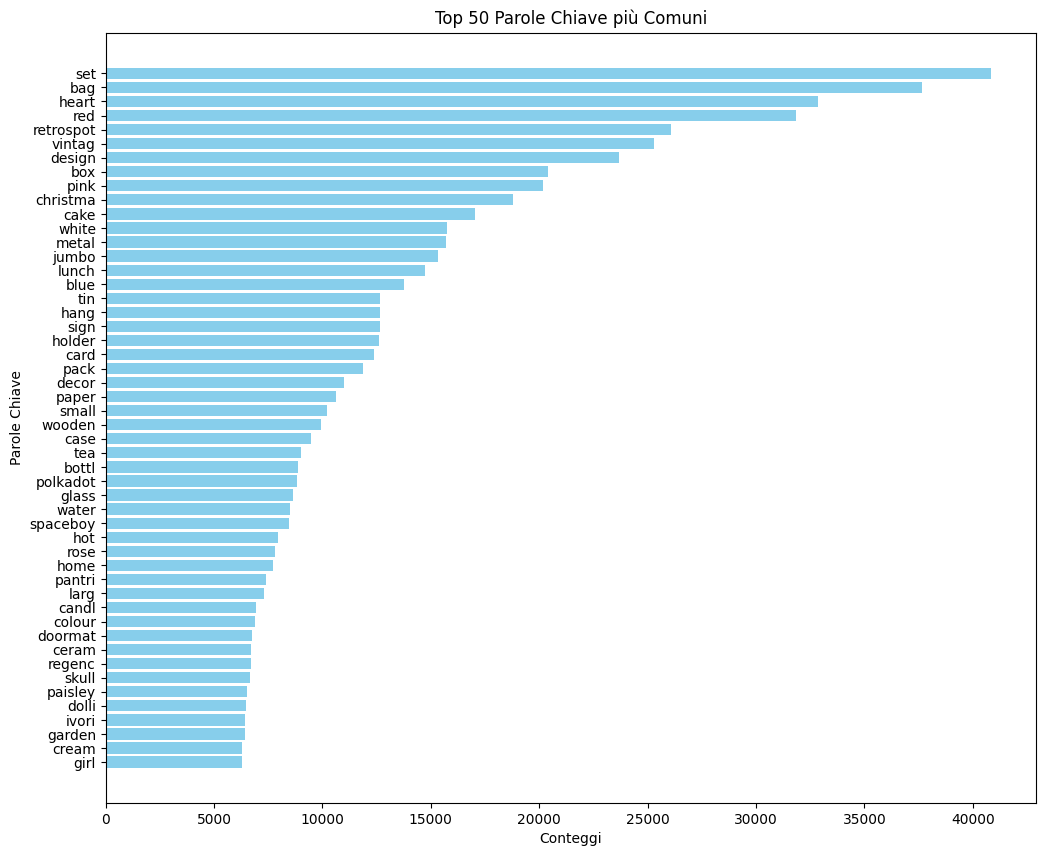

In [151]:
import matplotlib.pyplot as plt

# Dati delle parole chiave e dei relativi conteggi
top_keywords = ['set', 'bag', 'heart', 'red', 'retrospot', 'vintag', 'design', 'box', 'pink', 'christma',
                'cake', 'white', 'metal', 'jumbo', 'lunch', 'blue', 'tin', 'hang', 'sign', 'holder',
                'card', 'pack', 'decor', 'paper', 'small', 'wooden', 'case', 'tea', 'bottl', 'polkadot',
                'glass', 'water', 'spaceboy', 'hot', 'rose', 'home', 'pantri', 'larg', 'candl', 'colour',
                'doormat', 'ceram', 'regenc', 'skull', 'paisley', 'dolli', 'ivori', 'garden', 'cream', "girl"]

word_counts = [40855, 37668, 32880, 31822, 26063, 25300, 23663, 20396, 20191, 18808,
               17027, 15759, 15696, 15333, 14709, 13774, 12658, 12646, 12644, 12592,
               12386, 11855, 11003, 10622, 10210, 9918, 9482, 9007, 8862, 8835,
               8649, 8488, 8463, 7949, 7819, 7741, 7413, 7326, 6941, 6902,
               6741, 6700, 6696, 6675, 6541, 6480, 6425, 6412, 6297, 6292]

# Creazione del grafico a barre orizzontale
plt.figure(figsize=(12, 10))
plt.barh(top_keywords, word_counts, color='skyblue')
plt.xlabel('Conteggi')
plt.ylabel('Parole Chiave')
plt.title('Top 50 Parole Chiave più Comuni')
plt.gca().invert_yaxis()  # Inverti l'asse y per visualizzare la parola chiave più comune in alto
plt.show()



In [152]:
df.shape

(541909, 9)

Pur trattandosi di un dataset alquanto scarno e con una parte dei dati inutilizzabili a causa della mancanza del customer id l'analisi esplorativa evidenzia alcuni trend da considerare nella successiva fase di clusterizzazione, fra questi possiamo menzionare:

- la preponderanza di clienti provienienti dallo UK con oltre il 90% del fatturato proveniente dal Regno Unito è necessario prendere in considerazione questa metrica

- le fatture raggruppate per importo mostra una certa varietà ed una polarizzazione su fasce di prezzo medio basse per questo è necessario considerarle nel successivo sforzo di clusterizzazione

- la stagionalità degli ordini si concentra nel quarto trimestre come era normale attendersi da un e-commerce

- anche l'importo della fattura media per paese denota un possibile pattern di analisi dei dati e quindi di clusterizzazione

- anche il confronto fra articoli piu' venduti in uk e resto del mondo denota una sensibile divergenza nella tipologia di acquisto

- il dataset è un po' scarno e fornisce dati solo relativamente alla data e ora di emissione della fattura ma non al giorno e ora in cui viene piazzato l'ordine

Alla luce di questi elementi provvederemo a formulare una clusterizzazione prima dei prodotti e poi dei clienti sulla base delle abitudini di acquisto e di altre metriche emerse nella successiva fase di analisi dei dati.
